ARIMA EVO

In [9]:
import os
import glob
import pandas as pd
import numpy as np
import funcs_for_proc
from transformator import (
    relative_concentration, get_accepted_maximum_value,
    get_all_relative_concentration)
import warnings
warnings.simplefilter("ignore", UserWarning)

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
import warnings
from itertools import product
from tqdm import tqdm

def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))
%matplotlib inline
def log_progress(sequence, every=10):
    from ipywidgets import IntProgress
    from IPython.display import display

    progress = IntProgress(min=0, max=len(sequence), value=0)
    display(progress)
    
    for index, record in enumerate(sequence):
        if index % every == 0:
            progress.value = index
        yield record

In [4]:
data = funcs_for_proc.get_data_from_csv('final_data/data_train/data_train', 'csv','final_data/train.csv')


4.666943300000136e-06   H2
7.484558299989535e-05   CO
2.0437695400100236e-05   C2H4
5.818826101000097e-07   C2H2


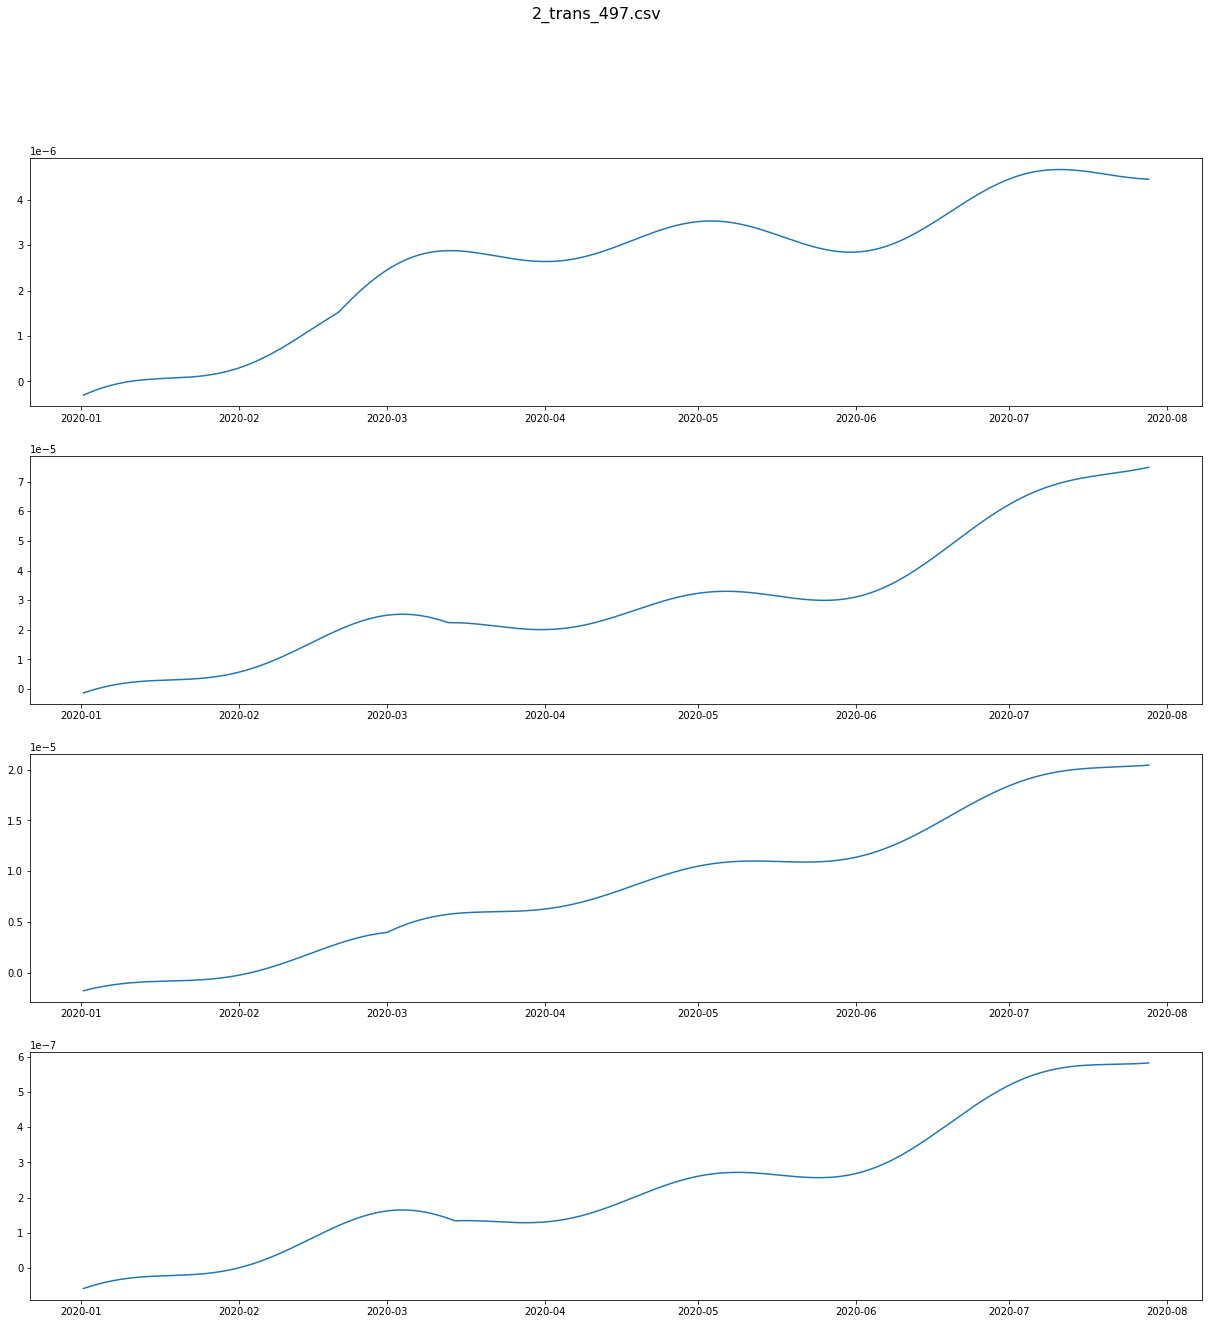

5.966684999999909e-06   H2
5.8248290000000036e-05   CO
3.410614919990059e-05   C2H4
6.925237900000066e-07   C2H2


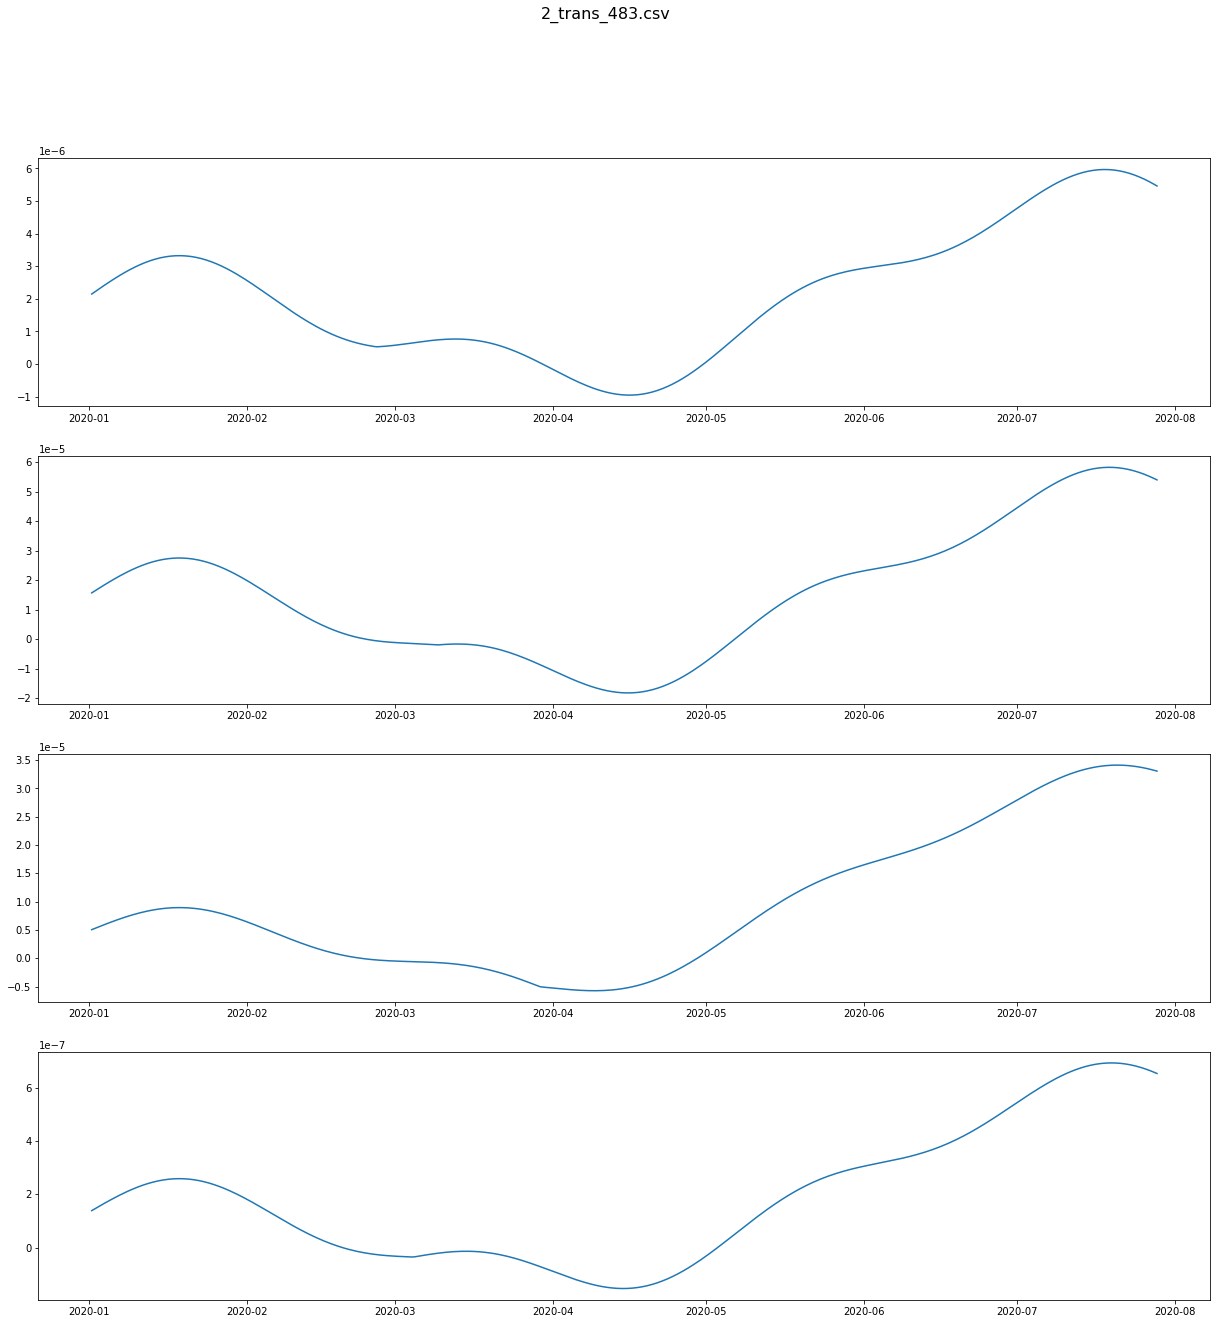

6.501188199999975e-06   H2
9.04517349999967e-05   CO
2.170946120000003e-05   C2H4
1.2064911399999956e-06   C2H2


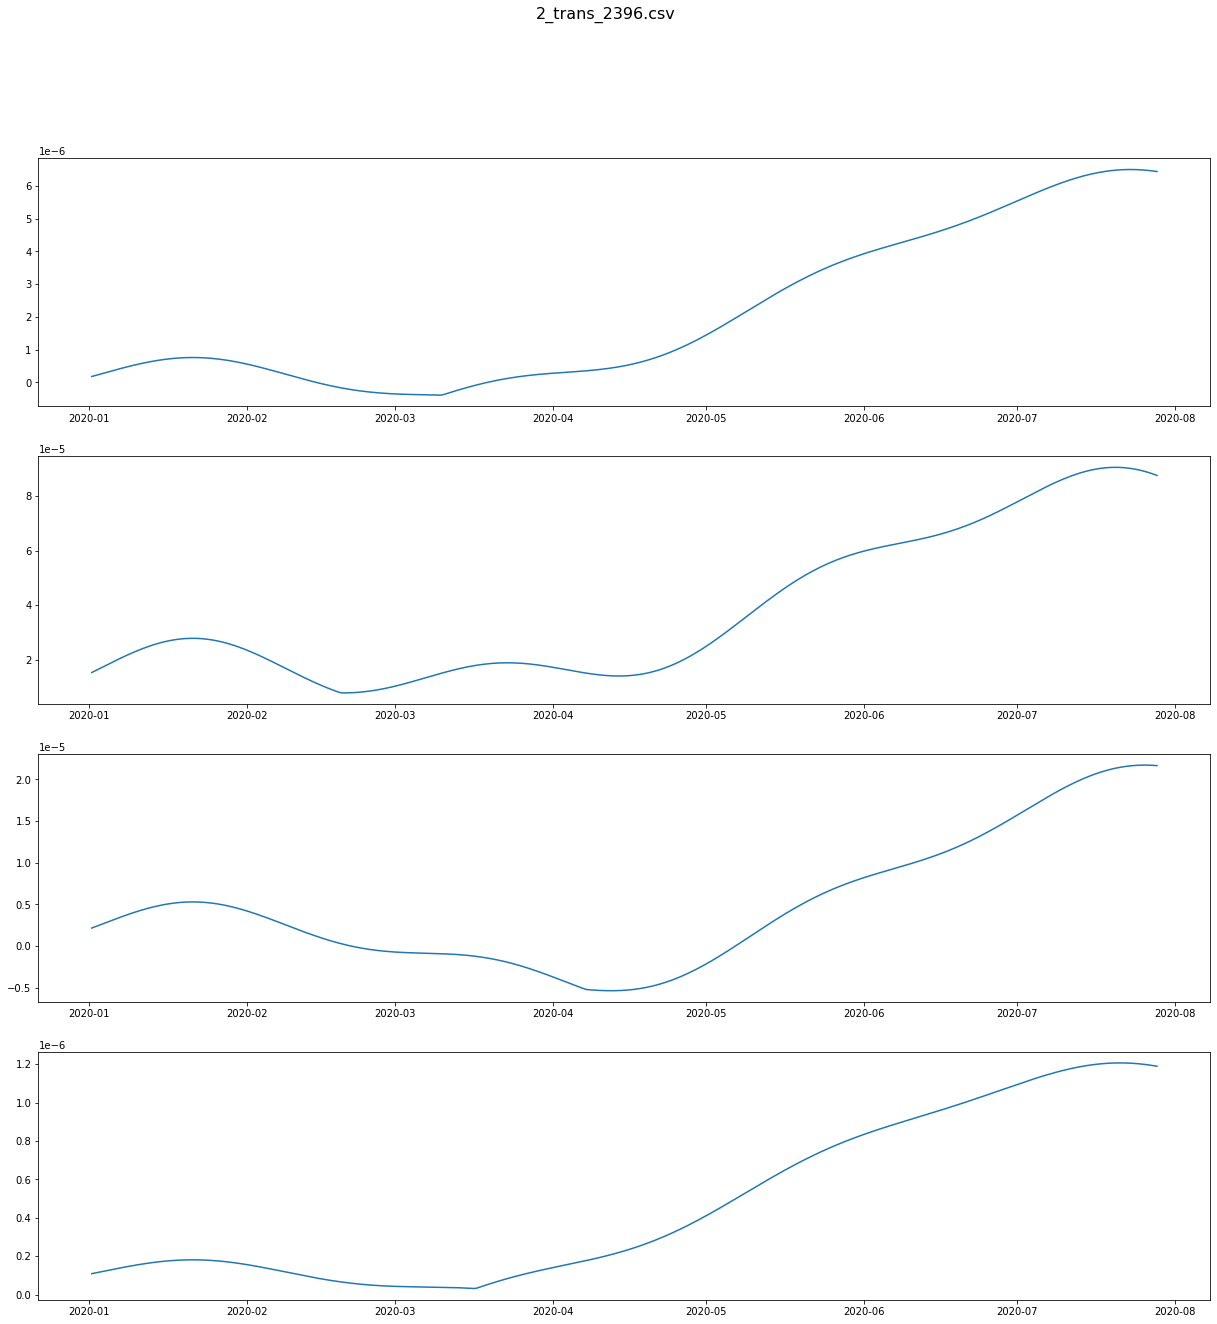

5.55431540009998e-06   H2
6.259393500000071e-05   CO
1.9073732400001417e-05   C2H4
2.9594013989999455e-07   C2H2


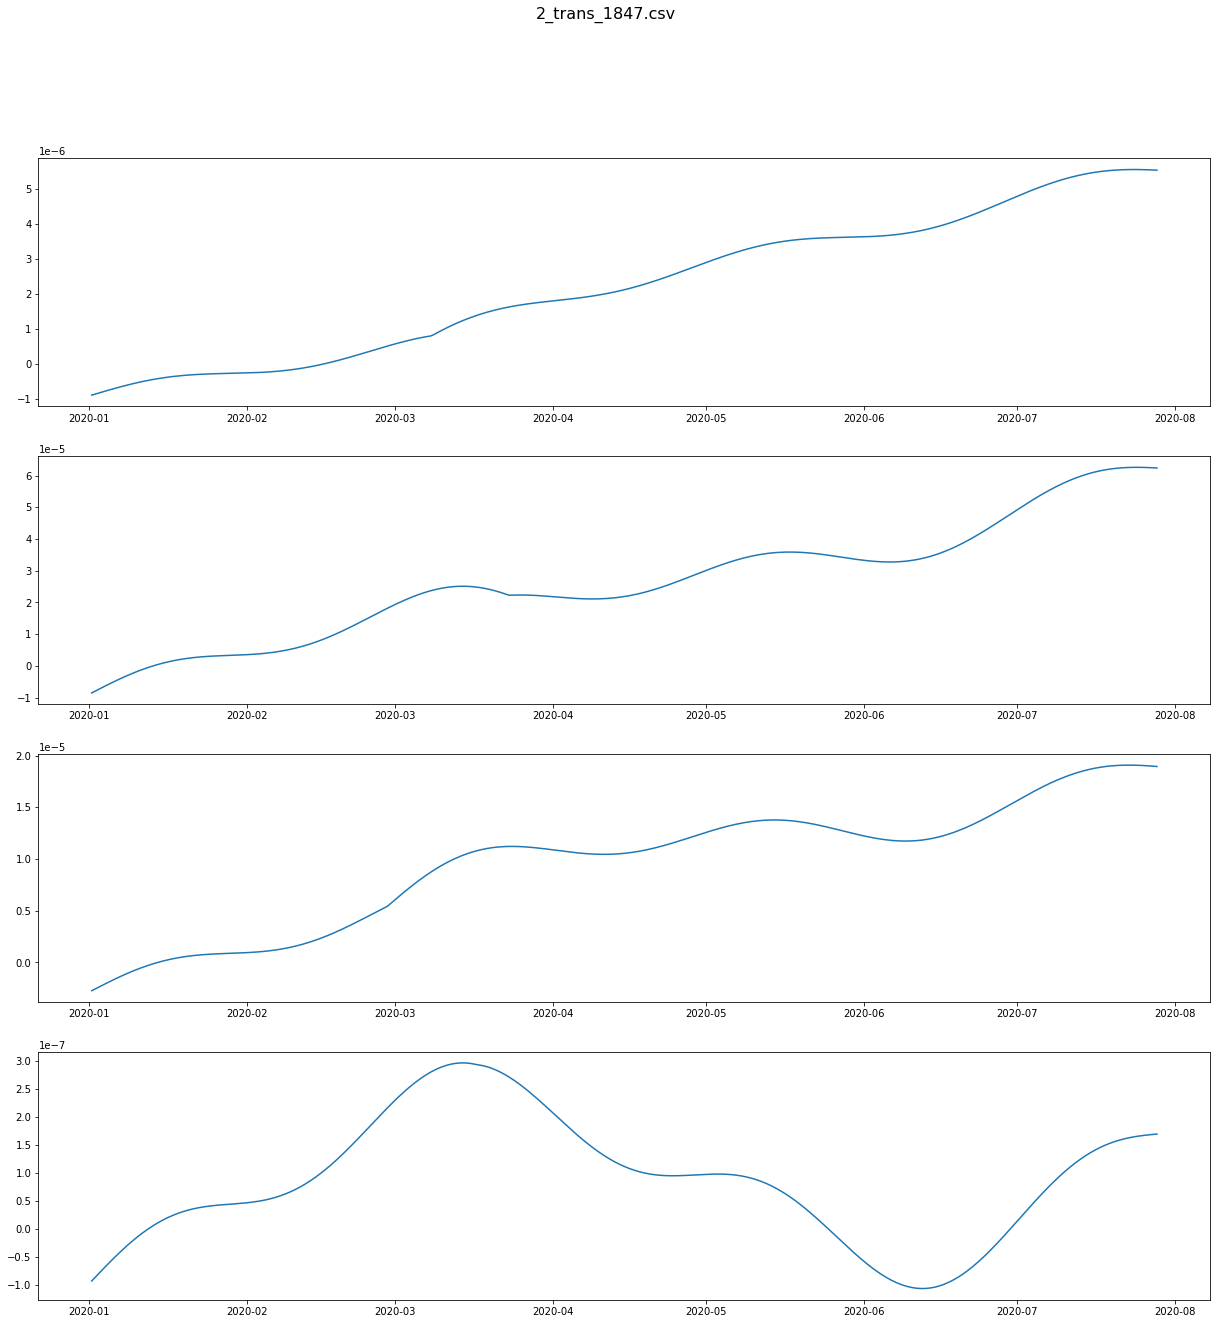

4.549672099999746e-06   H2
4.381112500000117e-05   CO
2.86300349999994e-05   C2H4
8.600990100000026e-07   C2H2


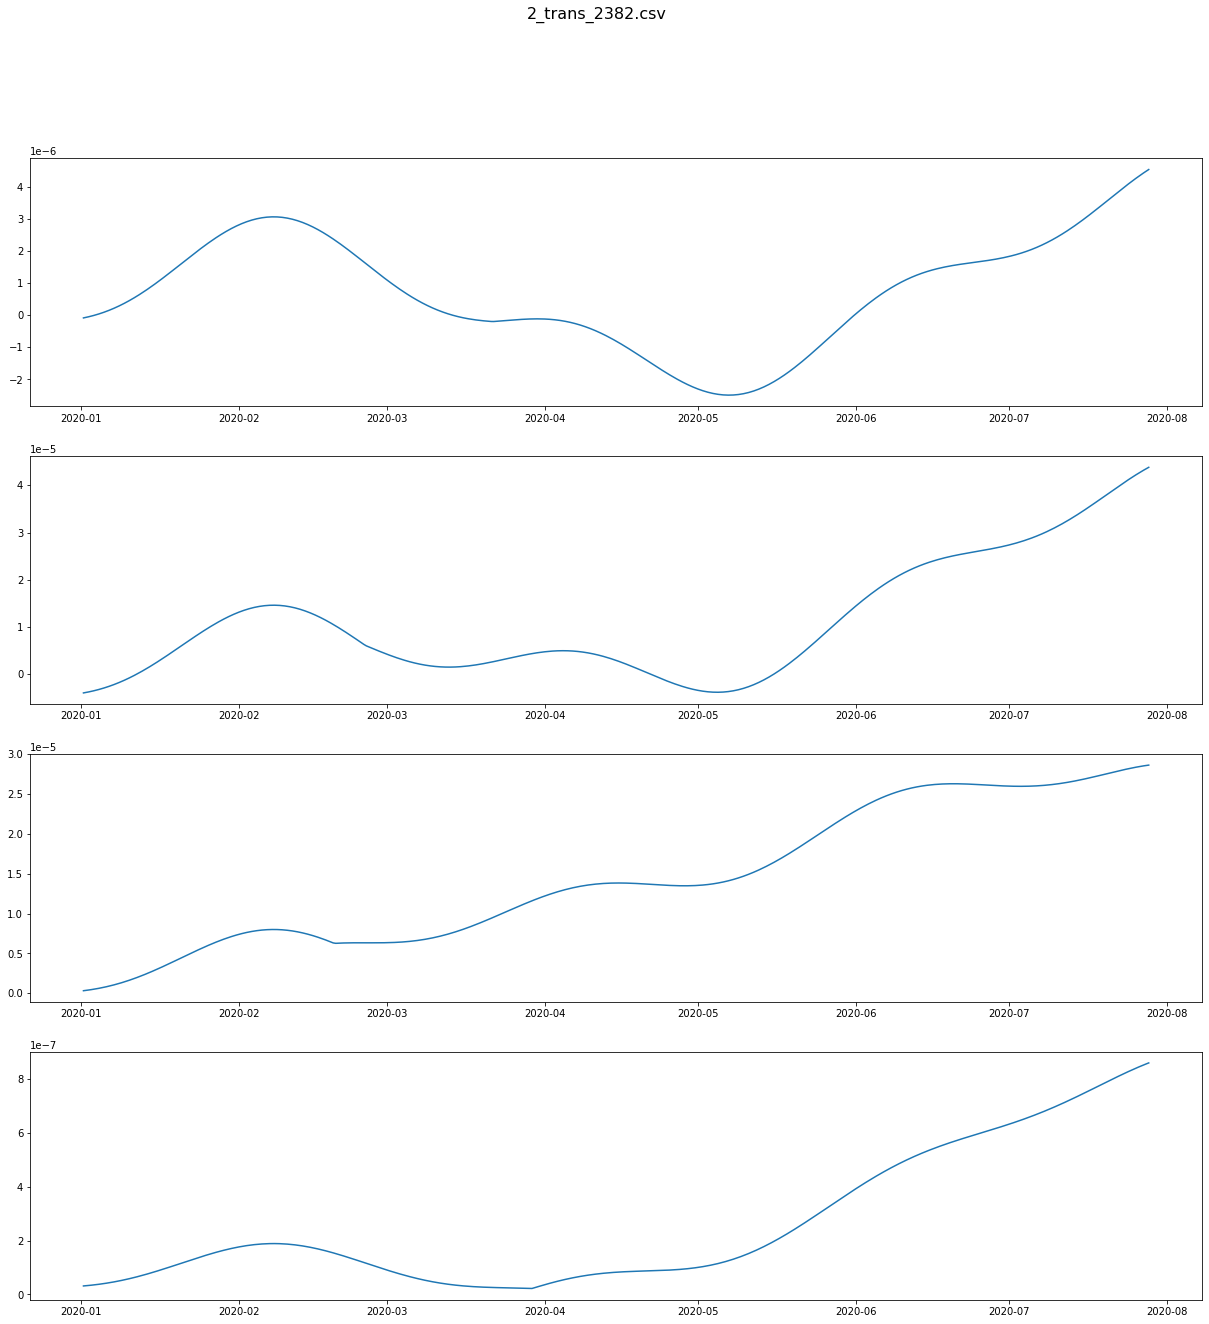

2.5512332000000512e-06   H2
7.404670799989951e-05   CO
3.077608799999937e-05   C2H4
8.545751700999996e-07   C2H2


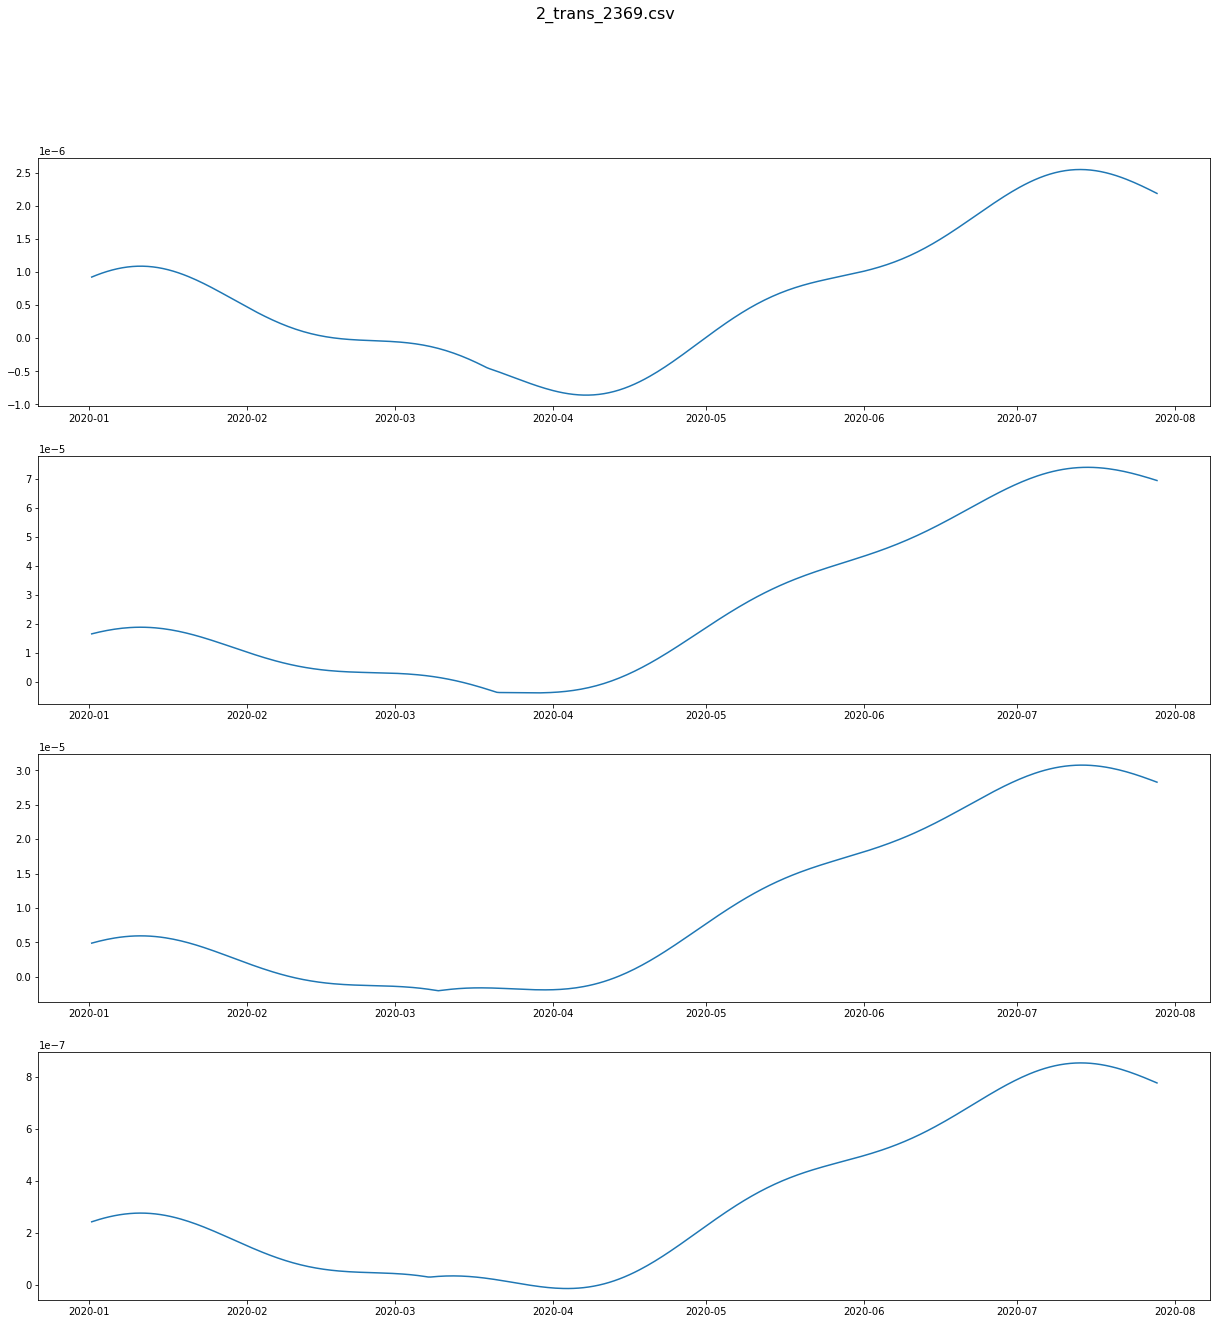

3.3911649000998093e-06   H2
8.938626899999969e-05   CO
2.5538636000000357e-05   C2H4
1.1548148899999974e-06   C2H2


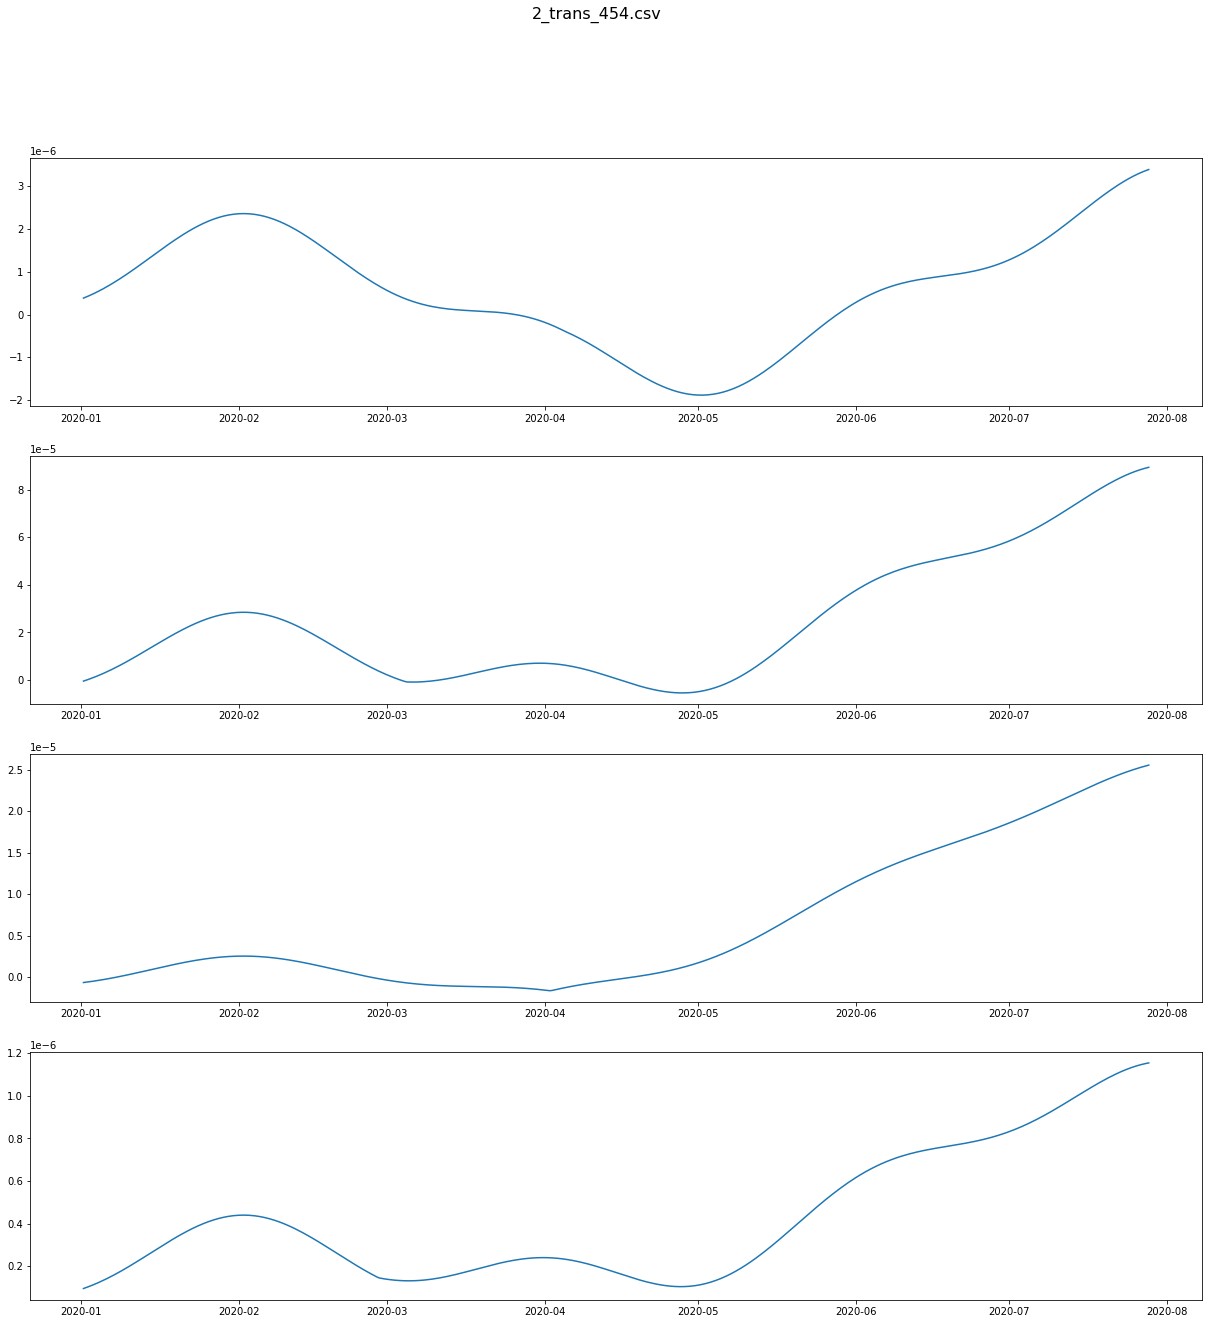

9.356142400000073e-06   H2
4.908906199990043e-05   CO
3.1860771000100443e-05   C2H4
1.0416311099999999e-06   C2H2


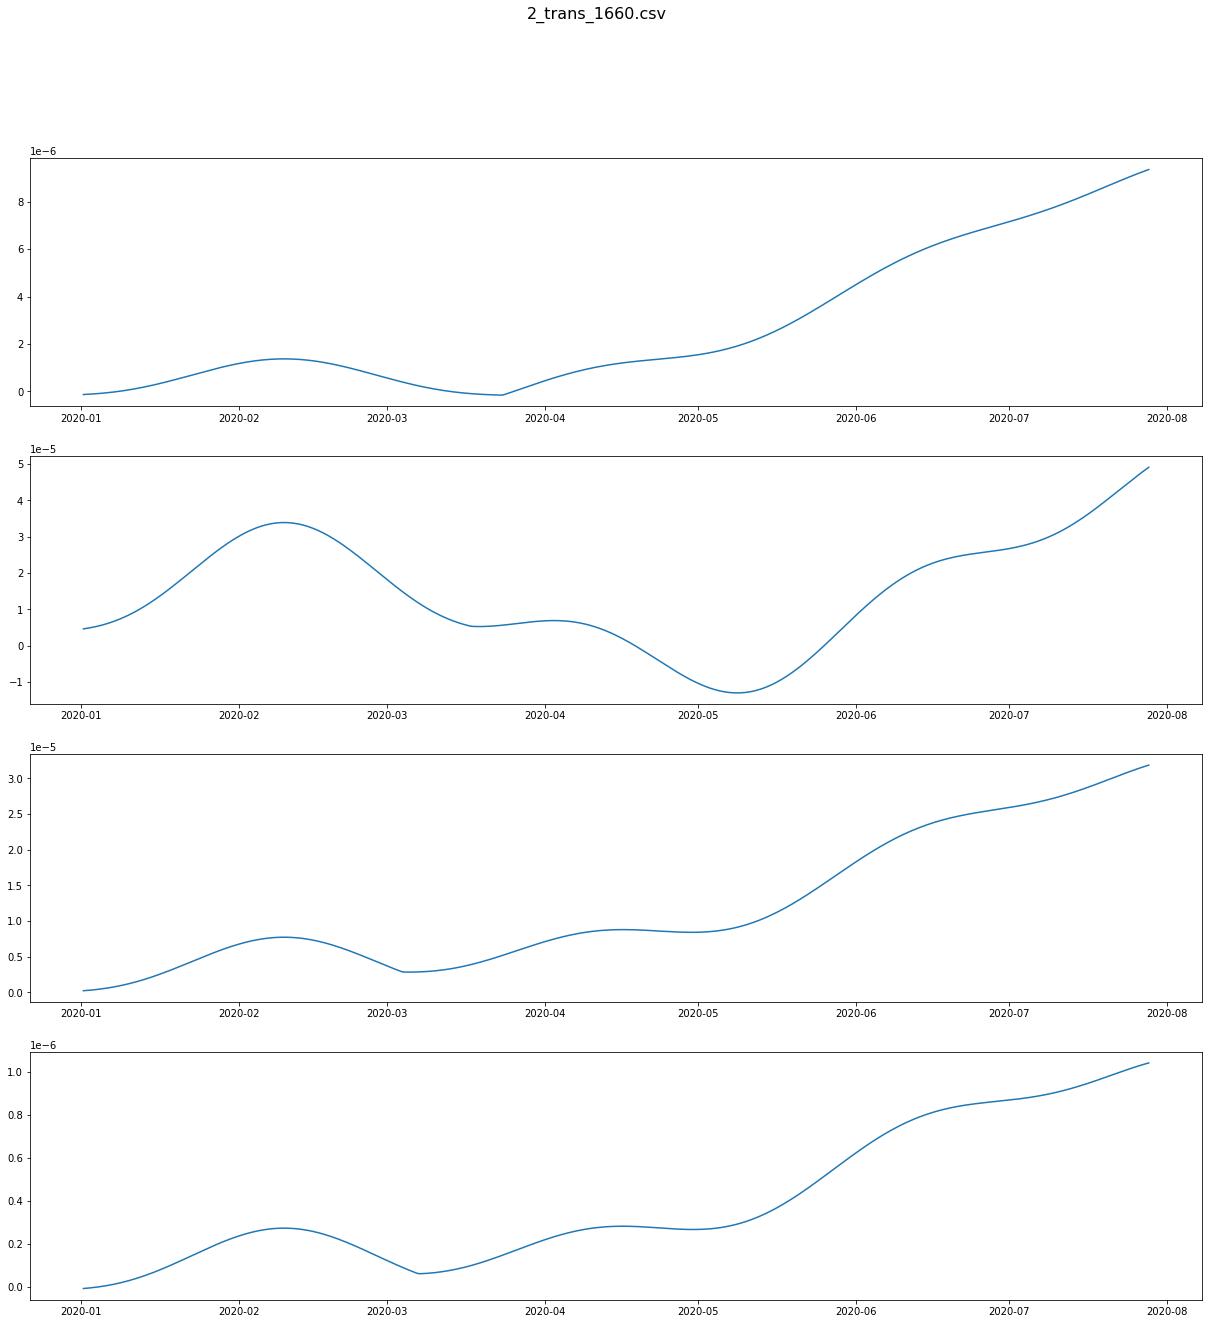

4.335246139900025e-06   H2
4.1545223999999575e-05   CO
5.426533199999993e-06   C2H4
1.505973750000019e-06   C2H2


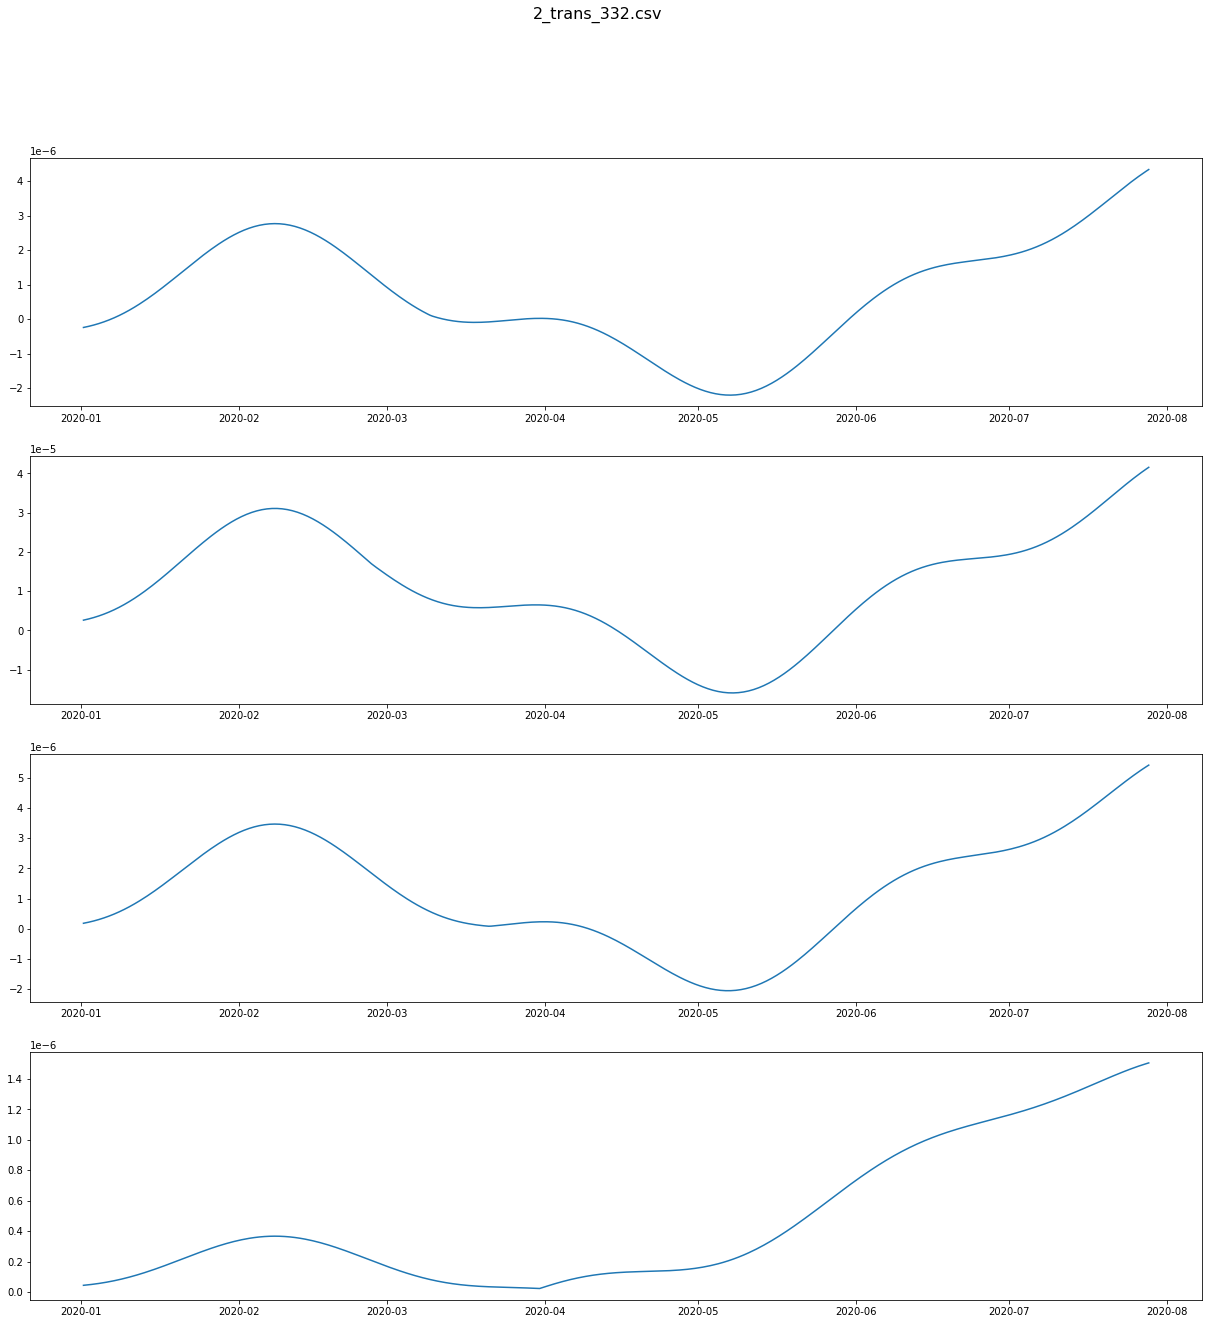

7.460409799999856e-06   H2
0.00012204788999999744   CO
3.0826262999900794e-05   C2H4
1.3152408100000027e-06   C2H2


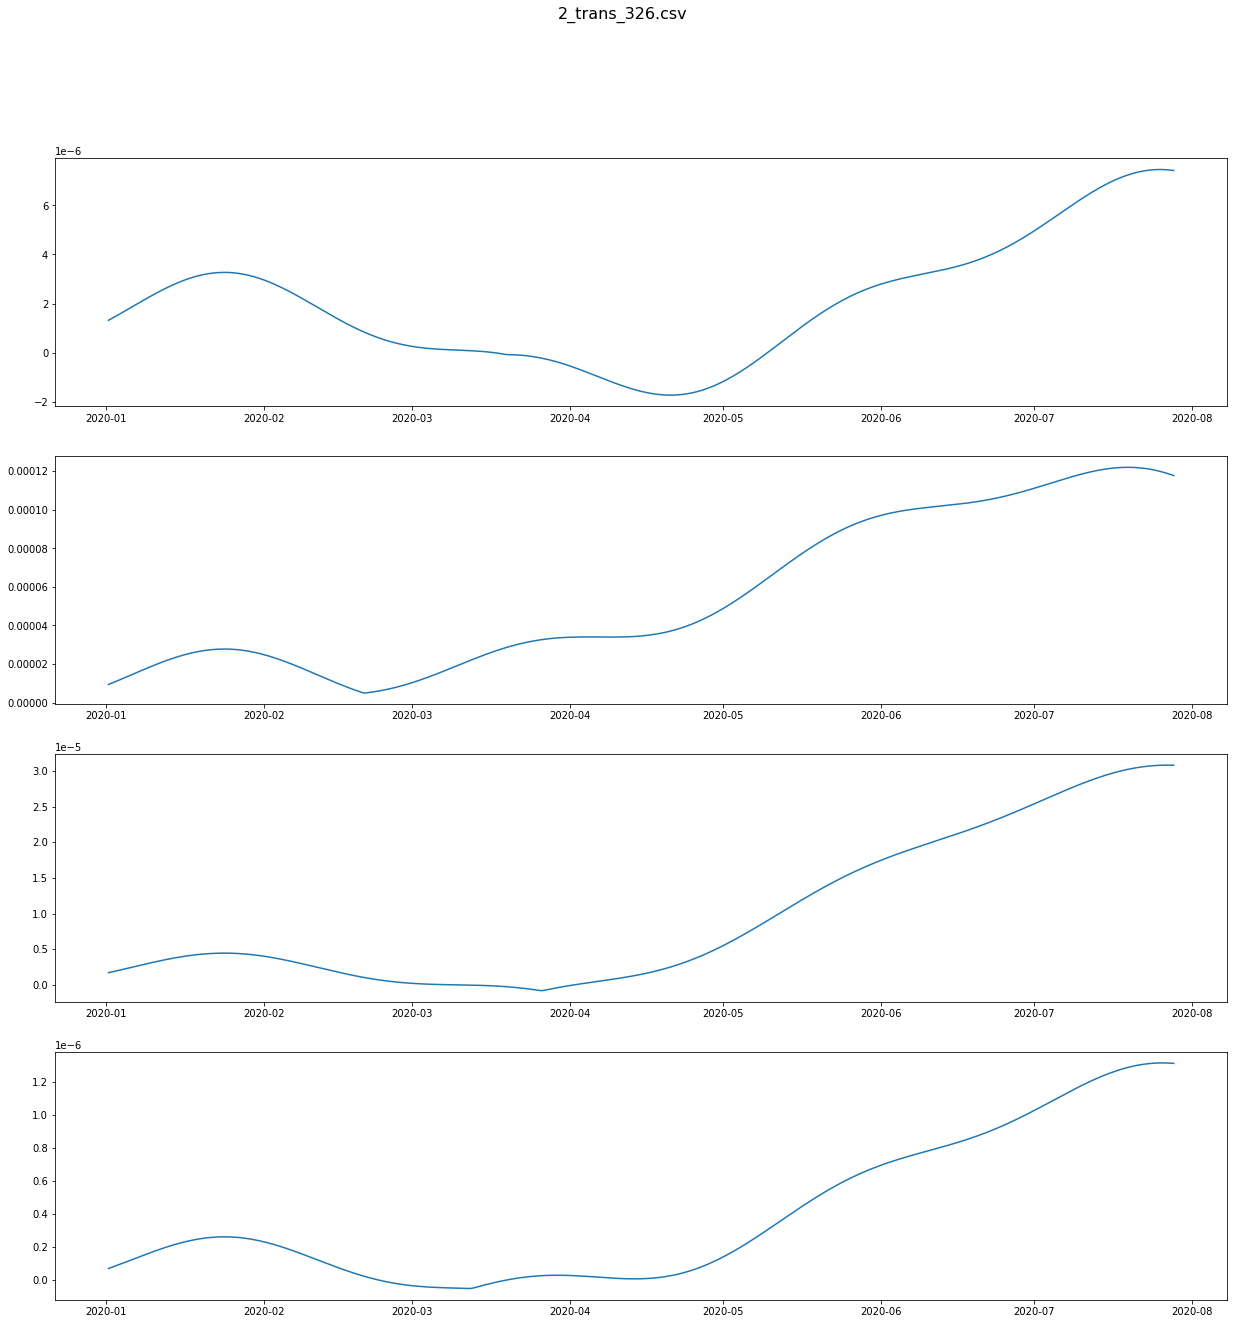

In [6]:
props = dict(boxstyle='round', facecolor='wheat', alpha=1)
for file in data[:10]:
    fig, ax = plt.subplots(4, 1, figsize=(21, 21))
    fig.suptitle(file[0], fontsize=16)
    data_normal=file[2]
    pred=file[1]
    for i, gas in enumerate(['H2', 'CO', 'C2H4', 'C2H2']):
#         datetime_pred= pd.date_range("2020-01-01", periods=pred, freq='12H')
#         accepted_level = get_accepted_maximum_value(gas, 0, '35kW')[0]
#         maximum_level = get_accepted_maximum_value(gas, 0, '35kW')[1]
#         max_axhspan_level = max(data_normal[gas].max(),maximum_level)*1.05

#         max_text_level = (max_axhspan_level - maximum_level) / 2 + maximum_level
#         accepted_text_level = (maximum_level - accepted_level) / 2 + accepted_level
#         normal_text_level = accepted_level / 2
#         text_egle = round(len(data_normal.index) * 0.90) 
#         # Графики
#         ax[i].vlines(datetime_pred[-1], 0, max_axhspan_level,
#           color = 'r',
#           linewidth = 2,
#           linestyle = '--')
#         ax[i].plot(data_normal.index, data_normal[gas], label=pred, color='green') 
#         # Зоны
#         ax[i].axhspan(0, accepted_level, facecolor='1', color='green', alpha=0.3)
#         ax[i].axhspan(accepted_level, maximum_level, facecolor='1', color='yellow', alpha=0.3)
#         ax[i].axhspan(maximum_level, max_axhspan_level, facecolor='1', color='red', alpha=0.3)
# #         Текст
#         ax[i].text(data_normal.index[text_egle], max_text_level, "Предотказное состояние", fontsize=12, color='black',
#                   bbox=props)
#         ax[i].text(data_normal.index[text_egle], accepted_text_level, "Развитие дефекта", fontsize=12, color='black',
#                   bbox=props)
#         ax[i].text(data_normal.index[text_egle], normal_text_level, "Нормальное состояние", fontsize=12, color='black',
#                   bbox=props)
#         ax[i].set_xlabel("Время", fontsize=12)
#         ax[i].set_ylabel(f'Концентрация {gas}', fontsize=12)
#         ax[i].legend()
        ax[i].plot(data_normal[gas].diff(1), label='V')
        print(data_normal[gas].diff(1).max(),' ',gas)

    plt.show()

In [ ]:
for file in data[:1]:
    data_normal=file[2]
    pred=file[1]
    for i, gas in enumerate (['H2', 'CO', 'C2H4', 'C2H2']):
        plt.figure(figsize=(21, 21))
        print("Dickey-Fuller test %s" %gas,sm.tsa.stattools.adfuller(data_normal[gas]))
        sm.tsa.seasonal_decompose(data_normal[gas]).plot()
        plt.show()


In [ ]:
for file in data[:1]:
    data_normal=file[2].diff(periods=1).dropna()
    pred=file[1]
    for i, gas in enumerate (['H2', 'CO', 'C2H4', 'C2H2']):
        plt.figure(figsize=(21, 21))
        restest=sm.tsa.stattools.adfuller(data_normal[gas])
        print("Dickey-Fuller test %s  %f" %(gas,restest[1]))
        if restest[0]> restest[4]['5%']: 
            print ('unstat')
        else:
            print('stat')
        sm.tsa.seasonal_decompose(data_normal[gas]).plot()
        plt.show()



In [ ]:
for file in data[:1]:
    data_normal=file[2].diff().dropna().diff().dropna()
    pred=file[1]
    for i, gas in enumerate (['H2', 'CO', 'C2H4', 'C2H2']):
        plt.figure(figsize=(21, 21))
        restest=sm.tsa.stattools.adfuller(data_normal[gas])
        print("Dickey-Fuller test %s  %f" %(gas,restest[1]))
        if restest[0]> restest[4]['5%']: 
            print ('unstat')
        else:
            print('stat')
        sm.tsa.seasonal_decompose(data_normal[gas]).plot()
        plt.show()



In [ ]:
file=data[30]
data_normal=file[2]
mindfGas=pd.DataFrame()
model_res={}
for i, gas in enumerate (['H2', 'CO', 'C2H4', 'C2H2']):
    print('----------------------------------------------------\nGAS %s'%gas)
    df=pd.DataFrame(columns=['aic','param','param_seasonal'])
    p  = q = range(0, 2)
    d=[2]
    pdq = list(product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 1) for x in pdq]
    warnings.filterwarnings("ignore") 
    aics=[]
    params=[]
    param_seasonals=[]
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(data_normal[gas],
                                                order=param,
                                                
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
                aics.append(results.aic)
                params.append(param)
                param_seasonals.append(param_seasonal)
            except BaseException as e :
                continue
    df=pd.DataFrame({'aic':aics,'param':params,'param_seasonal':param_seasonals})
    minaic_param=df[df.aic == df.aic.min()].iloc[[0]]
    print(minaic_param)
    print(minaic_param.param.values,minaic_param.param_seasonal.values)
    mod = sm.tsa.statespace.SARIMAX(data_normal[gas],
                                order=minaic_param.param.values[0],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    model_res[gas] = mod.fit()

    print(model_res[gas].summary().tables[1])

In [ ]:
for i, gas in enumerate (['H2', 'CO', 'C2H4', 'C2H2']):
    print('----------------------------------------------------\nGAS %s'%gas)
    model_res[gas].plot_diagnostics(figsize=(18, 8))
    model_forecast=model_res[gas]
    plt.show()

In [8]:
data_with_egde_val=pd.DataFrame(columns=['fime_name','H2', 'CO', 'C2H4', 'C2H2'])

for j,file in enumerate(log_progress(data,every=1)):
    print('%s'%file[0])
    models=funcs_for_proc.find_best_arima_model_for_gas(file)
    data_normal=file[2]
    row_data=[]
    row_data.append(file[0])
    for i, gas in enumerate (['H2', 'CO', 'C2H4', 'C2H2']):
        pred_val = models[gas].forecast(steps=file[1]-len(data_normal))
        row_data.append(pred_val[-1])
    data_with_egde_val.loc[j]=row_data

ModuleNotFoundError: No module named 'ipywidgets'

In [ ]:
data_with_egde_val

In [ ]:
for file in data[:10]:
    models=funcs_for_proc.find_best_arima_model_for_gas(file)
    funcs_for_proc.plot_predict(file,models)
    plt.show()